# MNIST Digit classification

## importing Libraries

In [6]:
import tensorflow as tf 
from tensorflow import keras 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

## Lodaing the dataset

In [43]:
digit_mnist = keras.datasets.mnist

In [44]:
(x_train,y_train),(x_test,y_test) = digit_mnist.load_data()

## Visualising the data 

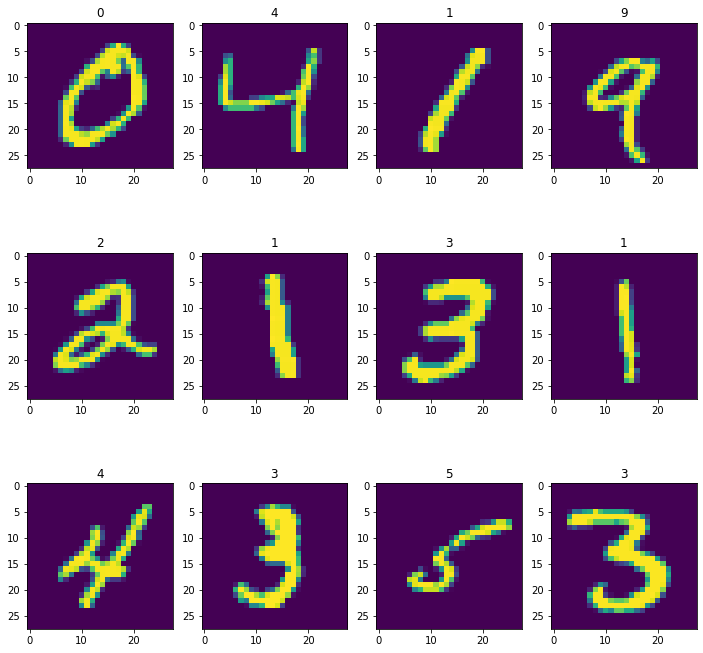

In [45]:

fig = plt.figure(figsize=(12,12))
row = 3
coloum  = 4 
for i in range (1 , coloum*row+1):
  Img = x_train[i]
  title = y_train[i]
  fig.add_subplot(row,coloum, i )
  plt.imshow(Img)
  plt.title(title) 

## Data Normalisation 

In [46]:
x_train = x_train/255.
x_test = x_test/255.

In [47]:
print(len(x_train))
print(len(y_train))

60000
60000


## Splitting the data in train and validation set 

In [48]:
x_valid , x_train = x_train[:10000],x_train[10000:]
y_valid , y_train = y_train[:10000],y_train[10000:]

In [49]:
print(len(x_valid))
print(len(x_train))
print(len(y_valid))
print(len(y_train))

10000
50000
10000
50000


### seeding so the ouput remains constistant every time 

In [50]:
np.random.seed(28)
tf.random.set_seed(28)


## Building the Model 

In [51]:
digit_model = keras.models.Sequential()
digit_model.add(keras.layers.Flatten(input_shape = [28,28]))
digit_model.add(keras.layers.Dense(300,activation='relu'))
digit_model.add(keras.layers.Dense(300,activation='relu'))
digit_model.add(keras.layers.Dense(10,activation='softmax'))

In [52]:
digit_model.summary(
)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_7 (Dense)              (None, 300)               90300     
_________________________________________________________________
dense_8 (Dense)              (None, 10)                3010      
Total params: 328,810
Trainable params: 328,810
Non-trainable params: 0
_________________________________________________________________


In [53]:
digit_model.compile(optimizer='sgd',
                    loss = 'sparse_categorical_crossentropy',
                    metrics = ['accuracy'])

## Trainning 

In [55]:
trained_digit_model = digit_model.fit(x_train,y_train,epochs=20,validation_data=(x_valid,y_valid))

Epoch 1/20
1563/1563 [==============================] - 6s 4ms/step - loss: 0.2156 - accuracy: 0.9384 - val_loss: 0.2051 - val_accuracy: 0.9408
Epoch 2/20
1563/1563 [==============================] - 6s 4ms/step - loss: 0.1888 - accuracy: 0.9464 - val_loss: 0.1864 - val_accuracy: 0.9485
Epoch 3/20
1563/1563 [==============================] - 6s 4ms/step - loss: 0.1681 - accuracy: 0.9526 - val_loss: 0.1666 - val_accuracy: 0.9519
Epoch 4/20
1563/1563 [==============================] - 6s 4ms/step - loss: 0.1505 - accuracy: 0.9573 - val_loss: 0.1538 - val_accuracy: 0.9555
Epoch 5/20
1563/1563 [==============================] - 6s 4ms/step - loss: 0.1364 - accuracy: 0.9618 - val_loss: 0.1453 - val_accuracy: 0.9585
Epoch 6/20
1563/1563 [==============================] - 6s 4ms/step - loss: 0.1241 - accuracy: 0.9646 - val_loss: 0.1377 - val_accuracy: 0.9605
Epoch 7/20
1563/1563 [==============================] - 6s 4ms/step - loss: 0.1138 - accuracy: 0.9677 - val_loss: 0.1286 - val_accuracy:

## Model Evaluation 

In [57]:
digit_model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0771 - accuracy: 0.9759


[0.07707271724939346, 0.9758999943733215]

We train the model for 20 epoch and the acuuracy of the model is **97.58 %**